In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

## Basic setup

Create anaconda environment
<br>
```bash
conda create -n ml python=3.7.4 jupyter
```
Install fastai library
<br>
```bash
conda install -c pytorch -c fastai fastai
```

# Set theory basics

Set (small) collection of mathematical (unique) elements $\{x, y, z, ...\}$, for instance, set of integers $\{1, 2, 3, ...\}$, set of real numbers $\mathbb{R}$. We can describe a set with its properties, e.g. set of real numbers between $1$ and $5$ will be $\{x | x \in \mathbb{R}, 1\leq x \leq 5 \}$.

In [2]:
S = set([2, 4])
A = {1, 2, 3, 4, 4}
B = {2, 4}
C = {1, 2, 18, 28}
type(S), type(A), type(B), A

(set, set, set, {1, 2, 3, 4})

We say that element $a \in A$ if element $a$ belongs to set $A$ and $a \notin A$ in the other case

In [3]:
1 in A, 2 in B, 3 in C

(True, True, False)

Note: sometimes we write $a, b \in A$ (or $a, b, c \in A$, $a,b,c,d \in A$, $a_1, a_2, ..., a_n \in A$) instead of $a \in A$ and $b \in A$ (or $a \in A$ and $b \in A$ and $c \in A$, $a \in A$ and $b \in A$ and $c \in A$ and $d \in A$, $a_1 \in A$ and $a_2 \in A$ and ... $a_n \in A$)

Set (category) of all "small" sets $Set$

Subset $B \subseteq A$ if for every $x$ element of $B$, $x \in A$ 

In [4]:
B.issubset(A), A.issubset(B)

(True, False)

Prove that $A \subseteq A$

Proper subset $B \subset A$ if for every element $b \in B$: $A \in A$ and there exists $a \in a$ such that: $a \notin B$, or in other words $B \subseteq A$ and $B \neq A$

If $A \subseteq B$ and $B \subseteq A$ $\to$ $A = B$

Empty set a $\emptyset$ is a set without elements at all and which is contained in any set $\emptyset \subseteq A$ for any $A \in Set$ so $\emptyset$ is the "smallest" set (Prove it)

In [5]:
# O = set()
O = {}
type(O)

dict

Intersection of two sets $A$ and $B$ $A \cap B$ is a "biggest" subset of $A$ and $B$, that means for every set $C$ such that, $C \subseteq A$ and $C \subseteq B$ $\to$ (implies) $C \subseteq A\cap B$

In [6]:
A.intersection(B), A.intersection(C), A, B, C

({2, 4}, {1, 2}, {1, 2, 3, 4}, {2, 4}, {1, 2, 18, 28})

Give an exmaples of two sets $A$ and $B$ for which $A \cap B = \emptyset$

Prove that if $B \subset A$ then $A \cap B = B$

Prove that $A \cap B = B \cap A$

Union of two sets $A$ and $B$ $A \cup B$ is a "smallest" set that contains both - $A$ and $B$, that means:
for every set $D$ such that $A \subseteq D$ and $B \subseteq D$ $\to$ (implies) $A \cup B \subseteq D$

In [7]:
A, C, A.union(C), A.union(B)

({1, 2, 3, 4}, {1, 2, 18, 28}, {1, 2, 3, 4, 18, 28}, {1, 2, 3, 4})

Prove that if $B \subset A$ then $A \cup B = A$

Prove that $A \cup B = B \cup A$

Difference between two sets $A$ snd $B$ is the set $A - B$ or $A \ B$ for which $a \in A - B$ if $a \in A$ and $a \notin B$

In [8]:
A - B, A - C, C - A, A, B, C

({1, 3}, {3, 4}, {18, 28}, {1, 2, 3, 4}, {2, 4}, {1, 2, 18, 28})

For set $A$ and subset $B$ we denote $A - B$ with $\overline{B}$ or $B^{C}$

Set of subsets (powerset) of the set $X$ will be $2^X = \{A | A \subseteq X\}$

In [9]:
from itertools import combinations, chain

pset = chain.from_iterable(set(combinations(A, r)) for r in range(len(A) + 1))
P_A = set(pset)
A, P_A, len(A), len(P_A), 2 ** (len(A)), len(P_A) == 2 ** (len(A))

({1, 2, 3, 4},
 {(),
  (1,),
  (1, 2),
  (1, 2, 3),
  (1, 2, 3, 4),
  (1, 2, 4),
  (1, 3),
  (1, 3, 4),
  (1, 4),
  (2,),
  (2, 3),
  (2, 3, 4),
  (2, 4),
  (3,),
  (3, 4),
  (4,)},
 4,
 16,
 16,
 True)

Cartesian product of sets $A$ and $B$ in set of ordered pairs := $A\times B = \{(a, b) | a \in A \textrm{ and } b\in B\}$

In [10]:
AxB = {(a, b) for a in A for b in B}
AxB, len(A), len(B), len(AxB)

({(1, 2), (1, 4), (2, 2), (2, 4), (3, 2), (3, 4), (4, 2), (4, 4)}, 4, 2, 8)

In [11]:
# AxBxC = ?

Exclusively for mathematicians $(a, b) = \{a, \{a, b\}\}$ and $A \times B = \{\{a, \{a, b\}\} | a \in A \textrm{ and } b\in B\}$

Every subset $R$ of $AxB$ is called relation. We write $aRb$ if and only if $(a, b) \in R$

Special cases of relations:

For every set $A$ the diagonal $\Delta \subseteq A \times A$ is $\{(a, a) | a \in A\}$

In [12]:
# delta = ? # Use comprehension

Equivalence relation on the set $A$: $E \subset A \times A$ with properties:
- For each $a \in A$ $aEa$, which means that diagonal $\Delta \subseteq E$ (reflexive property)
- For each $a, b \in A$ iff $aEb$ then $bEa$ (symmetric property)
- For each $a, b, c \in A$ if $aEb$ and $bEc$ then $aEc$


Partial order relation $\leq$
- For each $a \in A$ $a \leq a$, which means that diagonal $\Delta \subseteq E$ (reflexive property)
- For each $a, b \in A$ if $a \leq b$ and $b\leq a$ then $a = b$ (anti-symmetric property)
- For each $a, b, c \in A$ if $a \leq b$ and $b \leq c$ then $a \leq c$

Function, map $f$ between two sets $A$ and $B$ is the special relation such that for every $a\in A$ and every $b^{'}, b^{''} \in B$ if $af{b^{'}}$ and $af{b^{''}}$ $\to$ $b^{'}={b^{''}}$.


We write : $f:A \to B$ or $A \xrightarrow{f} B$ instead of $f \subseteq A \times B $ and $f(a)=b$ or $f:a \mapsto b$ instead of $afb$

We write $f, g :A \to B$ or $f_1, f_2, ..., f_n : A \to B$ instead of $f: A\to B$ and $g:A \to B$ or  $f_1: A \to B$ and $f_2 : A \to B$ ... $f_n : A \to B$

In [13]:
f = lambda x: x ** 2
A, set(map(f, A)), A

({1, 2, 3, 4}, {1, 4, 9, 16}, {1, 2, 3, 4})

Composition of $f:A \to B$ and $g:B \to C$ is $g \circ f : A \to C$ where $a \mapsto g(f(a))$ for each $a \in A$

or $A \xrightarrow{f} B \xrightarrow{g} C$ than $g \circ f:A \to C$

Identity map $1_A:A \to A$ is defined as $1_A(a) = a$ for each $a \ int A$
<br>
If set is given we sometimes write $1:A \to A$ for simplicity

In [14]:
g = lambda y: y + 12
gf = lambda x: g(f(x))
A, set(map(g, set(map(f, A)))), set(map(gf, A)), A

({1, 2, 3, 4}, {13, 16, 21, 28}, {13, 16, 21, 28}, {1, 2, 3, 4})

Injection (monomorphism): $m:A \to B$ is called injection if for eqch pair of elements $a^{'}, a^{''} \in A$ if $f(a^{'}) = f(a^{''})$ $\to$ $a^{'} = a^{''}$.

Surjection (epimorphism): $p:A \to B$ is called injection if for each pair of elements $a^{'}, a^{''} \in A$ if $f(a^{'}) = f(a^{''})$ $\to$ $a^{'} = a^{''}$.

Prove that:
- for every injection $m:A \to B$ and pair of functions $f, g :C \to A$: if $m \circ f = m \circ g$ then $f = g$ and vice-versa
- for every surjection $e:A \to B$ and every pair of functions $f, g :B \to C$: if $f \circ e = g \circ e$ then $f = g$ and vice-versa

Bijection: $f: A \to B$ is called bijection if $f$ is injection and surjection simultaneously

Prove that 
- composition of injections is injection itself
- composition of surjections is surjection itself
- composition of bijections is bijection itself
<br>
or give a counterexamples

If there exists a bijection between two sets $A$ and $B$, we call these two sets equivalent sets and write $A \equiv B$ or $A \cong B$

Prove that for each set $A$:
- $A \cong A$
- if $B \cong A$ then $B \cong A$ for every pair of sets $A$ and $B$
- if $A \cong B$ and $B \cong C$ then $A \cong C$ for every triplet $A$, $B$ and $C$

Prove that there exists a bijection between set of natural and even numbers

Prove thet if we have a bijection between two finite sets than they have an equal number of elements

Prove that $A \times B \cong B \times A$

Suppose we have a set $I$ and $A$ and bijection $i:I \to C \subseteq 2^A$ than $I$ is called index set.

Let $I = \mathbb{N}$ the we have a sequence of sets $(A_1, A_2, ...)$, or if $I$ is finite then we have a finite sequence of sets

We can generalize intersections and unions for as many sets as we want

$\cap_{i\in I}A_i$ and $\cup_{i\in I}A_i$

In [15]:
# Implement in Python

We can also define cartesian product of any "number" of sets $\prod_{i \in I}{A_i}$

In [16]:
# Implement in Python

- $\overline{\cap_{i\in I}A_i} = \cup_{i\in I}\overline{A_i}$
- $\overline{\cup_{i\in I}A_i} = \cap_{i\in I}\overline{A_i}$
<br>
or
<br>
- $\overline{A \cap B} = \overline{A} \cup \overline{B}$
- $\overline{A \cup B} = \overline{A} \cap \overline{B}$

Prove that:
$$A \cap (B \cup C)=(A \cap B) \cup (A\cap C)$$
$$A \cup (B \cap C)=(A \cup B) \cap (A\cup C)$$

# Linear Algebra

Branch of mathematics widely used in many fields. We'll introduce you to the essentials used in ML and DL.
Many notions are simplified (sorry to mathematicians) for better understanding and implementation.
We'll implement some basics of LA in NumPy library and have a glance of its use in CS fields.

## Scalars

Real set of numbers $\mathbb{R}$. Scalars as elements of the set of real numbers $x \in \mathbb{R}$ with sum, multiplication, etc.
We define subset of numbers: natural numbers $\mathbb{N}$, integers $\mathbb{Z}$, rational numbers $\mathbb{Q}$ and irrational numbers $\mathbb{R}\setminus\mathbb{Q}$

In [17]:
m = 100
n = 5.0
type(m), type(n), type(m + n), m + n

(int, float, float, 105.0)

Take $a \in \mathbb{R}$ then for each $b \in \mathbb{R}$ there exists $\alpha \in \mathbb{R}$ such that $b = \alpha a$

## Vectors

Vectors can be considered as a subset of cartesian product of $\mathbb{R}$ ($\mathbb{N}$, $\mathbb{Z}$, $\mathbb{Q}$, etc)
<br>
For instance vector $x = (x_1, x_2, \dots, x_n)$ we can write $x \in \mathbb{R}^{n}$
<br>

In [18]:
import numpy as np

In [19]:
la = [1, 2, 3, 4]
na = np.array([1, 2, 3, 4, 5])
la, na

([1, 2, 3, 4], array([1, 2, 3, 4, 5]))

In many cases we'll work with collumn vectors like $\begin{align}
    x &= \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{m}
         \end{bmatrix}
  \end{align}$

What is the difference between set $\{a_1, a_2, \dots, a_n\}$ and vector $(a_1, a_2, \dots, a_n)$?

Indexing the vectors

In [20]:
la[-1], la[2], la[2:], la[:-1], la[2:4]

(4, 3, [3, 4], [1, 2, 3], [3, 4])

In [21]:
na[-1], na[2], na[2:], na[:-1], na[2:4]

(5, 3, array([3, 4, 5]), array([1, 2, 3, 4]), array([3, 4]))

In [22]:
lid = [1, 2]
na[lid]

array([2, 3])

In [23]:
nid = np.array(lid)

In [24]:
na[lid]

array([2, 3])

## Matrices

Matrix $X$ can be considered as multidimensional array 
$\begin{align}
    X &= \begin{matrix}
        x_{11} & x_{12} & \dots x_{1m} \\
        x_{21} & x_{22} & \dots x_{2m} \\
        \vdots & \vdots & \vdots \\
        x_{n1} & x_{n2} & \dots x_{nm} \\
    \end{matrix}
\end{align}$
or 
$\begin{align}
    X &= \begin{pmatrix}
        x_{11} & x_{12} & \dots x_{1m} \\
        x_{21} & x_{22} & \dots x_{2m} \\
        \vdots & \vdots & \vdots \\
        x_{n1} & x_{n2} & \dots x_{nm} \\
    \end{pmatrix}
\end{align}$
or
$\begin{align}
    X &= \begin{bmatrix}
        x_{11} & x_{12} & \dots x_{1m} \\
        x_{21} & x_{22} & \dots x_{2m} \\
        \vdots & \vdots & \vdots \\
        x_{n1} & x_{n2} & \dots x_{nm} \\
    \end{bmatrix}
\end{align}$
<br>
Matrix also can be defined by indices $A_{i, j}$ if we don't need concrete demensions

We say that $X$ has $n \times m$ dimension
<br>
or $X \in \mathbb{R}^{n \times m}$

e.g. $\begin{align}
    X &= \begin{pmatrix}
        1 & 2 & 3 \\
        4 & 5 & 6 \\
        7 & 8 & 9 \\
    \end{pmatrix}
\end{align}$
<br>
Then $X_{23} = 6$

Main diagonal of matrix $X$ are elements $x_{i,j}$ where $i = j$
<br>
$\begin{align}
    X &= \begin{pmatrix}
        x_{11} &  & \dots \\
         & x_{22} & \dots \\
        \vdots & \vdots & \vdots \\
         &  & \dots x_{nm} \\
    \end{pmatrix}
\end{align}$


In [25]:
lm = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
nm = np.array(lm)  # np.array([[1, 2, 3], [4, 5, 6]])
print(lm)
print(nm)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [26]:
lm[1][2], nm[1][2]

(6, 6)

In [27]:
lm[1:], nm[1:]

([[4, 5, 6], [7, 8, 9]], array([[4, 5, 6],
        [7, 8, 9]]))

In [28]:
print(lm[1:2])
print(nm[1:, :])
nc_1 = nm[0, :]
print(nc_1)
nc_1[0] = 12
nm, nc_1

[[4, 5, 6]]
[[4 5 6]
 [7 8 9]]
[1 2 3]


(array([[12,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]]), array([12,  2,  3]))

In [29]:
np.diag(nm, k=0)

array([12,  5,  9])

## Tensors

Let's go to the higher dimesions and define tensor $X$ as part of $\mathbb{R}^{n \times m \times k}$
<br>
Then we have a three indices instead of two, and $x_{i, j, k}$ is the element of tensor $X$ across the $i, j$ and $k$ indices

In similar manner we can define more than three dimensional tensors $X \in \mathbb{R}^{n_1 \times n_2 \times \dots \times n_p}$

In [30]:
lt = [[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[10, 11, 12], [13, 14, 15], [16, 17, 18]]]
mt = np.array(
    lt
)  # or np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[10, 11, 12], [13, 14, 15], [16, 17, 18]]])
print(mt)
print(lt)

[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[10 11 12]
  [13 14 15]
  [16 17 18]]]
[[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[10, 11, 12], [13, 14, 15], [16, 17, 18]]]


In [31]:
mt = np.random.randint(0, 100, size=(3, 3, 3))

In [32]:
mt

array([[[75, 11, 55],
        [61, 98, 47],
        [56, 97, 98]],

       [[11, 52, 45],
        [ 7, 84, 55],
        [88, 77, 78]],

       [[82, 91, 57],
        [41, 66, 19],
        [34, 93, 21]]])

In [33]:
md = np.random.randint(0, 100, size=(2, 3, 4))

In [34]:
md

array([[[51, 65, 64, 30],
        [16, 92, 16, 69],
        [40, 90, 51, 88]],

       [[26, 53,  1, 34],
        [71, 14, 88, 45],
        [18, 97, 64, 21]]])

In [35]:
mmd = np.random.randint(0, 100, size=(2, 3, 4, 5, 6))

In [36]:
mmd

array([[[[[31, 86, 39, 63, 13, 55],
          [47, 85, 63, 96, 83, 80],
          [79, 94, 56, 20, 38, 67],
          [62, 40, 75,  1, 94, 88],
          [86, 81, 67,  3, 32, 88]],

         [[79, 38, 63, 28, 87, 30],
          [21, 36, 58, 76, 44, 59],
          [85, 49, 64, 84, 68, 62],
          [50, 20, 75, 92,  2, 50],
          [42, 76, 70, 23, 32, 76]],

         [[95, 61, 66, 79, 36, 60],
          [32,  0, 16, 29, 28, 37],
          [28, 76, 83, 33, 12, 31],
          [24, 91, 51, 39, 69, 24],
          [33, 63, 24, 10, 70,  9]],

         [[56, 97, 62, 32, 40, 97],
          [ 8, 56, 94, 98, 96, 13],
          [44, 24, 28, 88, 88, 19],
          [42, 93, 52, 70, 85, 41],
          [38,  0, 48, 13, 94, 80]]],


        [[[94, 88, 91, 94, 69, 47],
          [74, 80, 53, 68,  8, 40],
          [19, 96, 16, 76, 18, 72],
          [51, 92, 65, 35, 52, 73],
          [22,  8,  4, 57, 28, 47]],

         [[ 9, 89, 64, 96, 16, 21],
          [ 2, 70,  8, 19, 97, 40],
          [ 4, 3

Transpose of matrix $X$ denoted by $X^T$ defined by elements $(X^{T})_{i, j} = X_{j, i}$ or $X \in \mathbb{R}^{n \times m}$ then $T^{T} \in \mathbb{R}^{m \times n}$
<br>
e.g.
<br>
$\begin{align}
    X &= \begin{pmatrix}
        x_{11} & x_{12} & \dots x_{1m} \\
        x_{21} & x_{22} & \dots x_{2m} \\
        \vdots & \vdots & \vdots \\
        x_{n1} & x_{n2} & \dots x_{nm} \\
    \end{pmatrix}
\end{align}$ then $\begin{align}
    X^{T} &= \begin{pmatrix}
        x_{11} & x_{21} & \dots x_{m1} \\
        x_{12} & x_{22} & \dots x_{m2} \\
        \vdots & \vdots & \vdots \\
        x_{1n} & x_{2n} & \dots x_{mn} \\
    \end{pmatrix}
\end{align}$

Transpose can be thought as mirror along with the main diagonal

Visualisation of transpose matrix $X \in \mathbb{R}^{4 \times 4}$

![SegmentLocal](resources/linear-algebra-01/matrix-transposition-01.gif "segment")

Transpose matrix $X \in \mathbb{R}^{2 \times 3}$

![SegmentLocal](resources/linear-algebra-01/matrix-transposition-02.gif "segment")

We can consider scalar as one dimensional vector and vector as $v = (v_1, v_2, \dots, v_n)$ as matrix with $1 \times n$ dimensions and 
$\begin{align}
    u &= \begin{bmatrix}
           u_{1} \\
           u_{2} \\
           \vdots \\
           u_{m}
         \end{bmatrix}
 \end{align}$ as matrix with $m \times 1$ dimensions
<br>
then 
$\begin{align}
    v^{T} &= \begin{bmatrix}
           v_{1} \\
           v_{2} \\
           \vdots \\
           v_{n}
         \end{bmatrix}
 \end{align}$ and $u^{T} = (u_1, u_2, \dots, u_m)$

In [37]:
print(nm)

[[12  2  3]
 [ 4  5  6]
 [ 7  8  9]]


In [38]:
print(nm.T)

[[12  4  7]
 [ 2  5  8]
 [ 3  6  9]]


For scalar $a \in \mathbb{R}$ we have $a^{T} = a$

# Operations on Matrices

We can add two $A, B \in \mathbb{R}^{n \times m}$ matrices $C = A + B$ as 
$\begin{align}
    C &= \begin{pmatrix}
        {a_{11} + b_{11}} & {a_{12} + b_{12}} & \dots {a_{1m} + b_{1m}} \\
        {a_{21} + b_{21}} & {a_{22} + b_{22}} & \dots {a_{2m} + b_{2m}} \\
        \vdots & \vdots & \vdots \\
        {a_{n1} + b_{n1}} & {a_{n2} + b_{n2}} & \dots {a_{nm} + b_{nm}} \\
    \end{pmatrix}
\end{align}$ or we could write $c_{i, j} = a_{i, j} + b_{i, j}$

In [39]:
m1 = np.array([[2, 4, 6], [12, 14, 16], [22, 24, 26]])
m2 = np.array([[1, 3, 4], [11, 13, 14], [42, 44, 44]])
print(m1)
print(m2)
print(m1 + m2)

[[ 2  4  6]
 [12 14 16]
 [22 24 26]]
[[ 1  3  4]
 [11 13 14]
 [42 44 44]]
[[ 3  7 10]
 [23 27 30]
 [64 68 70]]


Add scalar $a \in \mathbb{R}$ and matrix $X \in \mathbb{R}^{n \times m}$ as 
$\begin{align}
    X + a &= \begin{pmatrix}
        {x_{11} + a} & {x_{12} + a} & \dots {x_{1m} + a} \\
        {x_{21} + a} & {x_{22} + a} & \dots {x_{2m} + a} \\
        \vdots & \vdots & \vdots \\
        {x_{n1} + a} & {x_{n2} + a} & \dots {x_{nm} + a} \\
    \end{pmatrix}
\end{align}$ or we could write ${(X + a)}_{i, j} = x_{i, j} + a$
<br>
In the same way we can define ${(a + X)}_{i, j} = a + x_{i, j}$
<br>
Multiplication of scalar and matrix
$\begin{align}
    Xa &= \begin{pmatrix}
        {x_{11}a} & {x_{12}a} & \dots {x_{1m}a} \\
        {x_{21}a} & {x_{22}a} & \dots {x_{2m}a} \\
        \vdots & \vdots & \vdots \\
        {x_{n1}a} & {x_{n2}a} & \dots {x_{nm}a} \\
    \end{pmatrix}
\end{align}$ or we could write ${(X + a)}_{i, j} = x_{i, j} + a$
<br>
In the same way we can define ${(aX)}_{i, j} = ax_{i, j}$
<br>
Thus, we have $C = aX + b$ for $a \in \mathbb{R}$ and matrix $X \in \mathbb{R}^{n \times m}$


Prove that $a + X = X + a$ and $aX = Xa$ for every scalar $a \in \mathbb{R}$ and matrix $X \in \mathbb{R}^{n \times m}$

In [40]:
m1, m1 * 5 + 2

(array([[ 2,  4,  6],
        [12, 14, 16],
        [22, 24, 26]]), array([[ 12,  22,  32],
        [ 62,  72,  82],
        [112, 122, 132]]))

Add matrix and vector $A + b$ where $A \in \mathbb{R}^{n \times m}$ $b \in \mathbb{R}^{1 \times m}$ can be done by broadcasting
<br>
$C_{i, j} = A_{i, j} + b_{j}$

In [41]:
v1 = np.array([[2], [4], [6]])

In [42]:
print(m1)
print(v1)
print(v1.T)
print(m1 + v1)
print(m1 + v1.T)

[[ 2  4  6]
 [12 14 16]
 [22 24 26]]
[[2]
 [4]
 [6]]
[[2 4 6]]
[[ 4  6  8]
 [16 18 20]
 [28 30 32]]
[[ 4  8 12]
 [14 18 22]
 [24 28 32]]


For matrix $A \in \mathbb{R}^{n \times m}$ and $B \in \mathbb{R}^{m \times l}$ let's define $C = AB$ as $C_{i, j} = \sum_{k = 1}^{n}{A_{i, k}B_{k, j}}$ it is clear that $C \in \mathbb{R}^{n \times l}$

Let's visualize

![SegmentLocal](resources/linear-algebra-01/matrix-multiplication-01.gif "segment")

In [43]:
m1 = np.array([[1, 2, 1], [0, 1, 0], [2, 3, 4]])
m2 = np.array([[2, 5], [6, 7], [1, 8]])

In [44]:
print(m1)
print(m2)

[[1 2 1]
 [0 1 0]
 [2 3 4]]
[[2 5]
 [6 7]
 [1 8]]


In [45]:
# m3 = np.dot(m1, m2)
m3 = m1 @ m2

In [46]:
print(m3)

[[15 27]
 [ 6  7]
 [26 63]]


Or slower version

![SegmentLocal](resources/linear-algebra-01/matrix-multiplication-02.gif "segment")

In [47]:
n1 = np.array([[8, 1, 2], [-5, 6, 7]])
n2 = np.array([[-5, 1], [0, 2], [-11, 7]])

In [48]:
print(n1)
print(n2)

[[ 8  1  2]
 [-5  6  7]]
[[ -5   1]
 [  0   2]
 [-11   7]]


In [49]:
# n3 = np.dot(n1, n2)
n3 = n1 @ n2

In [50]:
print(n3)  # , n3

[[-62  24]
 [-52  56]]


Hadamard product of $A \in \mathbb{R^{n \times m}}$ and $B \in \mathbb{R^{n \times m}}$ define $C = A \odot B$ if $C_{i, j} = A_{i, j}B_{i, j}$ (elementwise product)

In [51]:
a1 = np.random.random(size=(2, 3))
a2 = np.random.random(size=(2, 3))

In [52]:
print(a1)

print(a2)

print(a1 * a2)

[[0.71689167 0.96868372 0.71218694]
 [0.02943835 0.5077552  0.20890997]]
[[0.80226862 0.61208042 0.59547678]
 [0.29602181 0.15962579 0.99342964]]
[[0.57513969 0.59291234 0.42409079]
 [0.00871439 0.08105083 0.20753736]]


In [53]:
a1 = np.array([[1, 2], [4, 8], [3.0, 4.0]])
a2 = np.array([[2, 4.0], [4.0, 4], [3.0, 2.0]])

In [54]:
a1

array([[1., 2.],
       [4., 8.],
       [3., 4.]])

In [55]:
a2

array([[2., 4.],
       [4., 4.],
       [3., 2.]])

In [56]:
a1 * a2

array([[ 2.,  8.],
       [16., 32.],
       [ 9.,  8.]])

In [57]:
np.sum(a1 * a2)

75.0

In [58]:
np.multiply(a1, a2)

array([[ 2.,  8.],
       [16., 32.],
       [ 9.,  8.]])

In [59]:
np.sum(np.multiply(a1, a2))

75.0

In [60]:
a1 = np.arange(3 * 2).reshape((3, 2))
a1 = np.arange(3 * 2).reshape((2, 3))

In [61]:
a1

array([[0, 1, 2],
       [3, 4, 5]])

In [62]:
a2

array([[2., 4.],
       [4., 4.],
       [3., 2.]])

In [63]:
a1 @ a2

array([[10.,  8.],
       [37., 38.]])

Dot product of vectors $v, u \in \mathbb{R}^{n} \equiv \mathbb{R}^{1 \times n}$ define as $v^{T}u$

Prove that $uv^{T} = vu^{T}$ for each $v, u \in \mathbb{R}^{n}$

For each pair of matrices $A, B \in \mathbb{R}^{n \times m}$ holds:
- $A + B = B + A$
- $(A + B) + C = B + (A + C)$
- $A(B + C) = AB + AC$
- $A(BC) = (AB)C$

Prove that $(AB)^{T} = B^{T}A^{T}$ for each pair of matrices $A, B \in \mathbb{R}^{n \times m}$

For instance $Ax=b$

Vectorization vs loops

In [64]:
l1 = np.random.randn(3, 4)
l2 = np.random.randn(4, 6)
l1, l2

(array([[ 1.93134215, -0.64828616,  0.02991972, -2.2197597 ],
        [ 1.09698709, -1.10589243, -0.45027365,  0.01058273],
        [ 0.15907115,  0.64851265,  0.21877474, -0.91228403]]),
 array([[ 0.1516954 , -1.23580404, -1.33887083, -0.11056535, -0.27333465,
         -1.06571924],
        [ 0.91819478,  0.90036684,  0.92248638,  0.60032598,  0.93624962,
         -0.31566429],
        [-0.45281801,  0.90285271,  0.16057523, -1.15875892,  1.12331034,
         -0.41854448],
        [-0.16569934,  0.15676558,  0.09206975, -0.04020046, -2.30843177,
         -0.0245587 ]]))

In [65]:
def dot_prod(mx1, mx2, verbose=False):
    mx3 = np.zeros((mx1.shape[0], mx2.shape[1]))
    if verbose:
        print(f"mx3.shape = {mx3.shape}")
    for i in range(mx1.shape[0]):
        if verbose:
            print(f"i = {i}")
        for k in range(mx2.shape[1]):
            if verbose:
                print(f"\tk = {k}")
            for j in range(mx1.shape[1]):
                if verbose:
                    print(f"\t\tj = {j}")
                mx3[i, k] += mx1[i, j] * mx2[j, k]

    return mx3

In [66]:
%time l3_loop = dot_prod(l1, l2)

Wall time: 0 ns


In [67]:
l3_loop

array([[ 0.05198728, -3.2914246 , -3.38342118, -0.54815692,  4.02291255,
        -1.81163602],
       [-0.64687829, -2.75624172, -2.56022316, -0.26385153, -1.86546252,
        -0.63178985],
       [ 0.67169101,  0.44182514,  0.3364044 ,  0.15489829,  2.91538745,
        -0.44339993]])

In [68]:
%time l1 @ l2

Wall time: 0 ns


array([[ 0.05198728, -3.2914246 , -3.38342118, -0.54815692,  4.02291255,
        -1.81163602],
       [-0.64687829, -2.75624172, -2.56022316, -0.26385153, -1.86546252,
        -0.63178985],
       [ 0.67169101,  0.44182514,  0.3364044 ,  0.15489829,  2.91538745,
        -0.44339993]])

In [69]:
b1 = np.random.randn(500, 10000)
b2 = np.random.randn(10000, 800)
b1, b2

(array([[ 0.67150908,  0.44029631, -1.55795074, ..., -1.21925431,
          0.17666803,  1.5038209 ],
        [-0.73322965, -0.49077038,  0.45975745, ..., -0.2008115 ,
         -1.39199093,  0.98689045],
        [-0.5444034 ,  0.38546997,  0.34771402, ..., -0.19934418,
          1.54512407, -0.45493353],
        ...,
        [-0.83930523, -0.77834307, -0.42179524, ..., -1.48561382,
         -1.18300013, -1.16689215],
        [ 0.683     ,  0.60647161,  0.80362867, ...,  0.31356051,
          2.35762966, -0.41477218],
        [ 0.71886366, -0.27791815, -1.20652685, ..., -0.13324004,
         -0.30655597,  0.6551191 ]]),
 array([[-2.62273156,  0.7691603 ,  0.41722678, ..., -2.04477745,
          1.75401773,  0.04715338],
        [-0.4403065 ,  0.56093679,  0.46832148, ..., -1.01375052,
         -0.15829096,  1.01280746],
        [ 0.36312249,  2.3675498 , -0.24469263, ...,  1.25695686,
          0.28169642, -0.06491164],
        ...,
        [ 0.05698203, -1.63855868, -1.07937542, ..., -

In [70]:
# %time b3_loop = dot_prod(b1, b2)

In [71]:
def dot_prod_2(mx1, mx2, verbose=False):
    mx3 = np.zeros((mx1.shape[0], mx2.shape[1]))
    if verbose:
        print(f"mx3.shape = {mx3.shape}")
    for i in range(mx1.shape[0]):
        if verbose:
            print(f"i = {i}")
        for k in range(mx2.shape[1]):
            mx3[i, k] = mx1[i, :] @ mx2[:, k]
            if verbose:
                print(f"\tk = {mx1[i:]}")
                print(f"\tk = {mx2[:, k]}")

            # mx3[i, k] = s

    return mx3

In [72]:
# %time l3_loop = dot_prod_2(l1, l2)

In [73]:
l3_loop

array([[ 0.05198728, -3.2914246 , -3.38342118, -0.54815692,  4.02291255,
        -1.81163602],
       [-0.64687829, -2.75624172, -2.56022316, -0.26385153, -1.86546252,
        -0.63178985],
       [ 0.67169101,  0.44182514,  0.3364044 ,  0.15489829,  2.91538745,
        -0.44339993]])

In [74]:
# %time b3_loop = dot_prod_2(b1, b2)

Matrix vector multiplication

In [75]:
def dot_prod_3(mx1, mx2, verbose=False):
    mx3 = np.zeros((mx1.shape[0], mx2.shape[1]))
    if verbose:
        print(f"mx3.shape = {mx3.shape}")
    for i in range(mx1.shape[0]):
        if verbose:
            print(f"i = {i}")
        mx3[i, :] = mx1[i, :] @ mx2
        if verbose:
            print(f"\tk = {mx2[:, k]}")

            # mx3[i, k] = s

    return mx3

In [76]:
# %time l3_loop = dot_prod_3(l1, l2)

In [77]:
l3_loop

array([[ 0.05198728, -3.2914246 , -3.38342118, -0.54815692,  4.02291255,
        -1.81163602],
       [-0.64687829, -2.75624172, -2.56022316, -0.26385153, -1.86546252,
        -0.63178985],
       [ 0.67169101,  0.44182514,  0.3364044 ,  0.15489829,  2.91538745,
        -0.44339993]])

In [78]:
# %time b3_loop = dot_prod_3(b1, b2)

## Vectorize version

In [79]:
%time l3_vec = l1 @ l2

Wall time: 0 ns


In [80]:
l3_vec

array([[ 0.05198728, -3.2914246 , -3.38342118, -0.54815692,  4.02291255,
        -1.81163602],
       [-0.64687829, -2.75624172, -2.56022316, -0.26385153, -1.86546252,
        -0.63178985],
       [ 0.67169101,  0.44182514,  0.3364044 ,  0.15489829,  2.91538745,
        -0.44339993]])

In [81]:
%time b3_vec = b1 @ b2

Wall time: 733 ms


In [82]:
b3_vec

array([[  98.16895722,  219.30162698,    9.73699789, ...,   27.11858714,
         -67.83637234, -213.79704043],
       [-210.20480271,  -74.63514126, -124.71431629, ...,  158.49125872,
          90.46210843,  187.23829752],
       [-104.57432758,   98.02162467,   15.59350227, ...,   -1.14793157,
        -184.88117496,  -12.53856201],
       ...,
       [  40.23183866,  -15.96130212, -194.99502536, ..., -104.17480796,
        -153.7576308 ,  -40.02469272],
       [ -43.8296078 , -132.82416358,  -73.11428395, ...,   76.13099134,
        -180.15223917,  -47.14334453],
       [ 127.07146566,  -35.36434571,   53.74259278, ...,  -82.39547937,
         224.53591313, -183.60046817]])

In [83]:
# %time l3 = l1 @ l2

In [84]:
# %time b3 = b1 @ b2

In [85]:
# %time b3_vec = b1 @ b2

## Functions on tensors

We can define function $f:A \to B$ where $A, B \in \mathbb{R}^{n1 \times n2 \dots \times n_{k}}$ where function is defined elementwise $B_{i, j} = f(A_{i, j})$

For instance function $f(x) = x + 5$ on matrix $A \in \mathbb{R}^{n \times m}$ will give us $A + 5$

In [86]:
mt = np.array([[1, 2], [-1, -2], [0.0, 4.0]])
f = lambda x: x + 5
print(mt)
print(f(mt))
print(mt + 5)

[[ 1.  2.]
 [-1. -2.]
 [ 0.  4.]]
[[6. 7.]
 [4. 3.]
 [5. 9.]]
[[6. 7.]
 [4. 3.]
 [5. 9.]]


In [87]:
import math

In [88]:
f = lambda x: x ** 2

In [89]:
f(-1)

1

In [90]:
x = np.linspace(-5, 5, 1000)

In [91]:
x

array([-5.        , -4.98998999, -4.97997998, -4.96996997, -4.95995996,
       -4.94994995, -4.93993994, -4.92992993, -4.91991992, -4.90990991,
       -4.8998999 , -4.88988989, -4.87987988, -4.86986987, -4.85985986,
       -4.84984985, -4.83983984, -4.82982983, -4.81981982, -4.80980981,
       -4.7997998 , -4.78978979, -4.77977978, -4.76976977, -4.75975976,
       -4.74974975, -4.73973974, -4.72972973, -4.71971972, -4.70970971,
       -4.6996997 , -4.68968969, -4.67967968, -4.66966967, -4.65965966,
       -4.64964965, -4.63963964, -4.62962963, -4.61961962, -4.60960961,
       -4.5995996 , -4.58958959, -4.57957958, -4.56956957, -4.55955956,
       -4.54954955, -4.53953954, -4.52952953, -4.51951952, -4.50950951,
       -4.4994995 , -4.48948949, -4.47947948, -4.46946947, -4.45945946,
       -4.44944945, -4.43943944, -4.42942943, -4.41941942, -4.40940941,
       -4.3993994 , -4.38938939, -4.37937938, -4.36936937, -4.35935936,
       -4.34934935, -4.33933934, -4.32932933, -4.31931932, -4.30

In [92]:
fv = f  # np.vectorize(f)

In [93]:
fx = fv(x)

In [94]:
x.shape, fx.shape

((1000,), (1000,))

In [95]:
import matplotlib.pyplot as plt

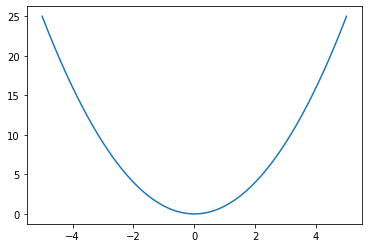

In [96]:
plt.plot(x, fx)

In [97]:
sig = np.vectorize(lambda x: 1 / (1 + math.exp(-x)))

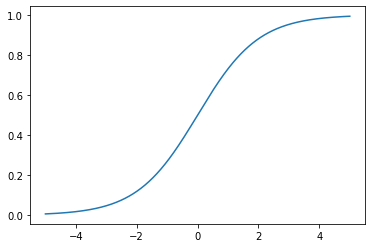

In [98]:
plt.plot(x, sig(x))

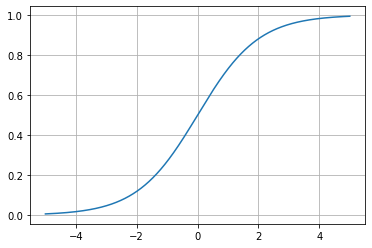

In [99]:
plt.plot(x, sig(x))
plt.grid()

## Images as tensors and matrices

In [100]:
import cv2

In [ ]:
! pip install opencv-python

In [102]:
from pathlib import Path

In [103]:
resources = Path.cwd() / "resources"

In [ ]:
resources

In [105]:
img_brg = cv2.imread(
    str(resources / "linear-algebra-01" / "tbilisi.jpg"), cv2.IMREAD_ANYCOLOR
)

In [106]:
type(img_brg), img_brg.shape

(numpy.ndarray, (2333, 3500, 3))

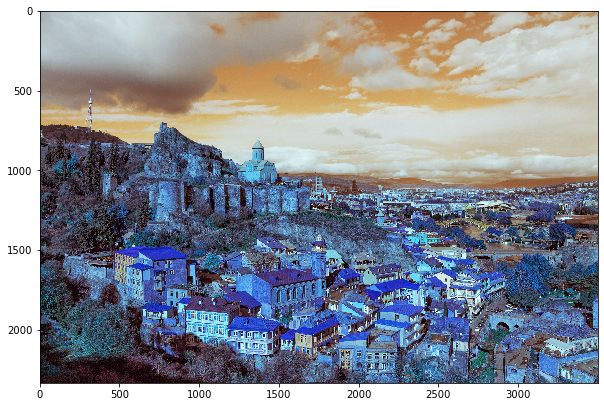

In [107]:
plt.figure(figsize=(10, 10))
plt.imshow(img_brg, cmap=None)
plt.show()

In [108]:
img = cv2.cvtColor(img_brg, cv2.COLOR_RGB2BGR)

In [109]:
import matplotlib.pyplot as plt

In [110]:
def show_img(im, figsize=(10, 10), cmap=None):
    plt.figure(figsize=figsize)
    plt.imshow(im, cmap=cmap)
    plt.show()

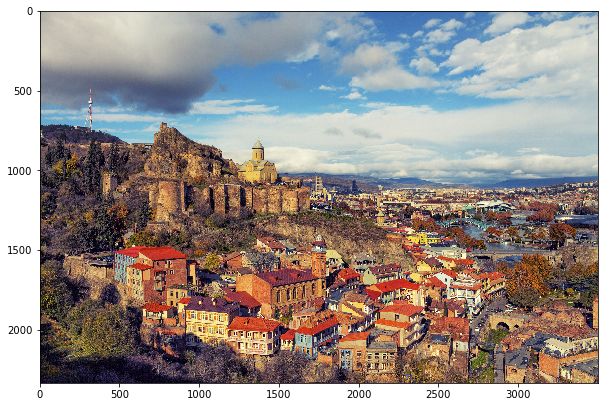

In [111]:
show_img(img)

In [112]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

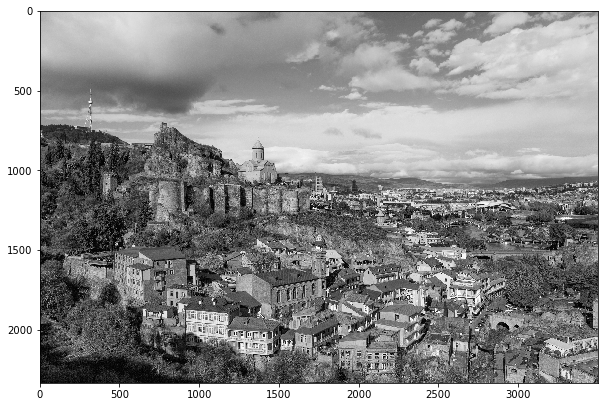

In [113]:
show_img(gray, cmap="gray")

In [114]:
gray_t = gray.T

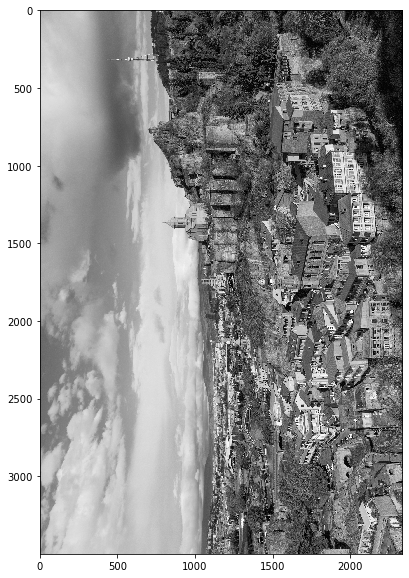

In [115]:
gray_t.shape
show_img(gray_t, cmap="gray")

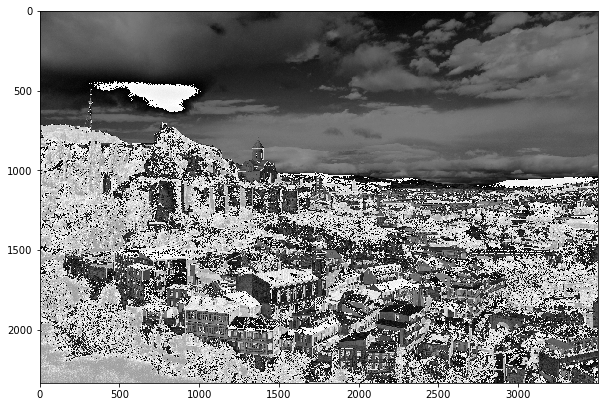

In [116]:
show_img(gray - 100, cmap="gray")

## Example 1

In [117]:
X = np.random.rand(10)
A = np.random.rand(10)
b = np.random.rand(1)

In [118]:
A @ X + b

array([3.8819121])

In [119]:
sig(A @ X + b)

array([0.97980487])

## Example 2

In [120]:
W = np.array([20, 20])  # Weights
b = np.array([-30])  # bias

In [121]:
X = np.array([1, 0])

In [122]:
d = sig(W @ X + b)

In [123]:
np.around(d, decimals=1)

array([0.])

In [124]:
ff = lambda _X, _W, _b: sig(np.dot(_W.T, _X) + _b)

In [125]:
BA = [[0, 0], [0, 1], [1, 0], [1, 1]]

In [126]:
for ba in BA:
    print(ba, np.around(ff(ba, W, b), decimals=1))

[0, 0] [0.]
[0, 1] [0.]
[1, 0] [0.]
[1, 1] [1.]


Change bias

In [127]:
b = np.array([-10])

In [128]:
for ba in BA:
    print(ba, np.around(ff(ba, W, b), decimals=1))

[0, 0] [0.]
[0, 1] [1.]
[1, 0] [1.]
[1, 1] [1.]


Write combination for $XOR$ calculation

In [129]:
# Code for XOR calculation